# **Data Science:: Healthcare - Persistency of a drug**
# **Problem Statement:**

One of the challenge for all Pharmaceutical companies is to understand the persistency of drug as per the physician prescription. To solve this problem ABC pharma company approached an analytics company to automate this process of identification.

**ML Problem:**

With an objective to gather insights on the factors that are impacting the persistency, build a classification for the given dataset.

**Target Variable:** Persistency_Flag

# **Task:**

Problem understanding

Data Understanding

Data Cleaning and Feature engineering

Model Development

Model Selection

Model Evaluation

Report the accuracy, precision and recall of both the class of target variable

Report ROC-AUC as well

Deploy the model

Explain the challenges and model selection





In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
from sklearn.preprocessing import LabelEncoder

In [62]:
#Read the Data
df = pd.read_excel("Healthcare_dataset.xlsx",sheet_name= "Dataset")

In [63]:
#Head
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [64]:
df_backup = df.copy(deep=True)

In [65]:
df_backup

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,P3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,Y,N,N,N,N,N,N,1
3420,P3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
3421,P3422,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,...,N,N,Y,N,N,N,N,N,N,1
3422,P3423,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0


1. Total number of records

In [66]:
count = df.index
no_of_records = len(count)
print('Total number of records:',no_of_records)

print('\nThe details of the Dataframe are as :\n')
df.info()

Total number of records: 3424

The details of the Dataframe are as :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                        

2. Data types for all columns

In [67]:
df.dtypes

Ptid                              object
Persistency_Flag                  object
Gender                            object
Race                              object
Ethnicity                         object
                                   ...  
Risk_Hysterectomy_Oophorectomy    object
Risk_Estrogen_Deficiency          object
Risk_Immobilization               object
Risk_Recurring_Falls              object
Count_Of_Risks                     int64
Length: 69, dtype: object

3. Missing Values in the Dataset

In [68]:
df.isnull().sum()

Ptid                              0
Persistency_Flag                  0
Gender                            0
Race                              0
Ethnicity                         0
                                 ..
Risk_Hysterectomy_Oophorectomy    0
Risk_Estrogen_Deficiency          0
Risk_Immobilization               0
Risk_Recurring_Falls              0
Count_Of_Risks                    0
Length: 69, dtype: int64

4. Descriptive Statistics

In [69]:
df.describe()

,Dexa_Freq_During_Rx,Count_Of_Risks
count,3424.000000,3424.000000
mean,3.016063,1.239486
std,8.136545,1.094914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,3.000000,2.000000
max,146.000000,7.000000


In [70]:
(df == 0).sum()

Ptid                                0
Persistency_Flag                    0
Gender                              0
Race                                0
Ethnicity                           0
                                 ... 
Risk_Hysterectomy_Oophorectomy      0
Risk_Estrogen_Deficiency            0
Risk_Immobilization                 0
Risk_Recurring_Falls                0
Count_Of_Risks                    970
Length: 69, dtype: int64

Persistent and non-persistent count

In [71]:
#Based on the Persistency_Flag
x= df.groupby('Persistency_Flag').size()
print("The number of persistent patients is :", x[1])
print("The number of non-persisitent patients is :", x[0])

The number of persistent patients is : 1289
The number of non-persisitent patients is : 2135


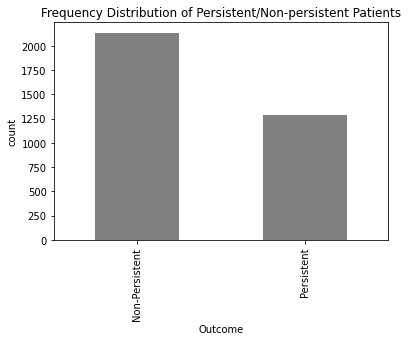

In [72]:
#Bar plot for the frequencies 
df['Persistency_Flag'].value_counts().plot(xlabel='Outcome', ylabel='count',color = 'Grey',kind ='bar', title = 'Frequency Distribution of Persistent/Non-persistent Patients')

The dataset consists of mainly the categorical data which can be converted to integer values. So lets do label encoding


In [73]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [74]:
df.describe()

,Dexa_Freq_During_Rx,Count_Of_Risks
count,3424.000000,3424.000000
mean,3.016063,1.239486
std,8.136545,1.094914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,3.000000,2.000000
max,146.000000,7.000000


# Data Conversion

In [75]:
#get all categorical columns
cat_columns = df.select_dtypes(['object']).columns

#convert all categorical columns to numeric
df[cat_columns] = df[cat_columns].apply(lambda x: pd.factorize(x)[0])

#view updated DataFrame
df

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,1,2,1,1,2,0,0,0,...,0,1,0,0,0,0,0,0,0,2
3,3,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,3419,0,1,0,0,2,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3420,3420,0,1,0,0,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3421,3421,0,1,0,0,2,0,2,1,1,...,0,0,1,0,0,0,0,0,0,1
3422,3422,1,1,0,0,2,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
df.describe()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
count,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.00000,3424.000000,3424.000000,...,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000
mean,1711.500000,0.623540,0.943341,0.164428,0.081776,1.455900,0.993867,2.25993,0.412091,0.561916,...,0.104556,0.012266,0.477804,0.056075,0.019568,0.015771,0.003213,0.004089,0.020152,1.239486
std,988.567988,0.484568,0.231223,0.600523,0.358162,0.991542,0.965195,4.43358,0.492283,0.774045,...,0.306025,0.110088,0.499580,0.230100,0.138530,0.124607,0.056597,0.063822,0.140540,1.094914
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,855.750000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1711.500000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2567.250000,1.000000,1.000000,0.000000,0.000000,2.000000,2.000000,3.00000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3423.000000,1.000000,1.000000,3.000000,2.000000,4.000000,3.000000,35.00000,1.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [77]:
#from sklearn.preprocessing import LabelEncoder
#label_encoder = LabelEncoder()
#df = df.apply(LabelEncoder().fit_transform)

Correlation among variables

In [78]:
df.corr()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
Ptid,1.000000,0.020089,-0.051937,0.068704,0.056913,0.001151,0.045739,0.194514,0.215906,0.257940,...,0.032349,0.015736,0.042898,-0.003615,0.032335,0.012664,-0.011432,0.028778,0.017961,0.012717
Persistency_Flag,0.020089,1.000000,0.010343,0.015006,0.022571,-0.016627,-0.021803,0.009933,-0.139387,-0.091667,...,0.003492,0.009920,-0.079782,0.045277,0.040138,0.016106,0.012155,0.049787,0.021345,-0.082210
Gender,-0.051937,0.010343,1.000000,0.018723,-0.011061,-0.017273,0.025932,-0.045759,-0.010406,-0.014671,...,0.021815,0.027311,0.032103,-0.006158,-0.001859,0.031023,0.013913,-0.004093,-0.036774,-0.002931
Race,0.068704,0.015006,0.018723,1.000000,0.187386,-0.009651,0.008293,0.010716,0.017781,0.012973,...,-0.018862,0.004835,0.040895,-0.022347,0.010477,-0.019049,-0.015547,-0.017547,-0.018503,0.024068
Ethnicity,0.056913,0.022571,-0.011061,0.187386,1.000000,0.044708,0.009902,0.026349,0.034156,0.028097,...,0.004596,-0.010629,0.011780,-0.027299,0.038396,-0.002722,-0.012964,-0.014632,-0.021141,0.000703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Risk_Hysterectomy_Oophorectomy,0.012664,0.016106,0.031023,-0.019049,-0.002722,-0.022743,0.029953,0.010028,-0.001205,-0.016185,...,0.002712,-0.014107,0.024397,0.009903,0.015965,1.000000,-0.007186,0.028624,-0.001471,0.141469
Risk_Estrogen_Deficiency,-0.011432,0.012155,0.013913,-0.015547,-0.012964,-0.010489,0.032448,0.044405,0.025867,-0.001208,...,-0.019399,-0.006327,-0.012976,-0.013837,-0.008020,-0.007186,1.000000,-0.003638,-0.008142,0.077153
Risk_Immobilization,0.028778,0.049787,-0.004093,-0.017547,-0.014632,-0.001766,-0.037533,0.028249,-0.016451,-0.011040,...,-0.021895,-0.007140,-0.024640,0.262889,-0.009052,0.028624,-0.003638,1.000000,0.023381,0.098860
Risk_Recurring_Falls,0.017961,0.021345,-0.036774,-0.018503,-0.021141,-0.028212,-0.059391,0.000030,0.023502,0.027467,...,0.025714,0.002901,0.020936,0.046352,0.084778,-0.001471,-0.008142,0.023381,1.000000,0.186956


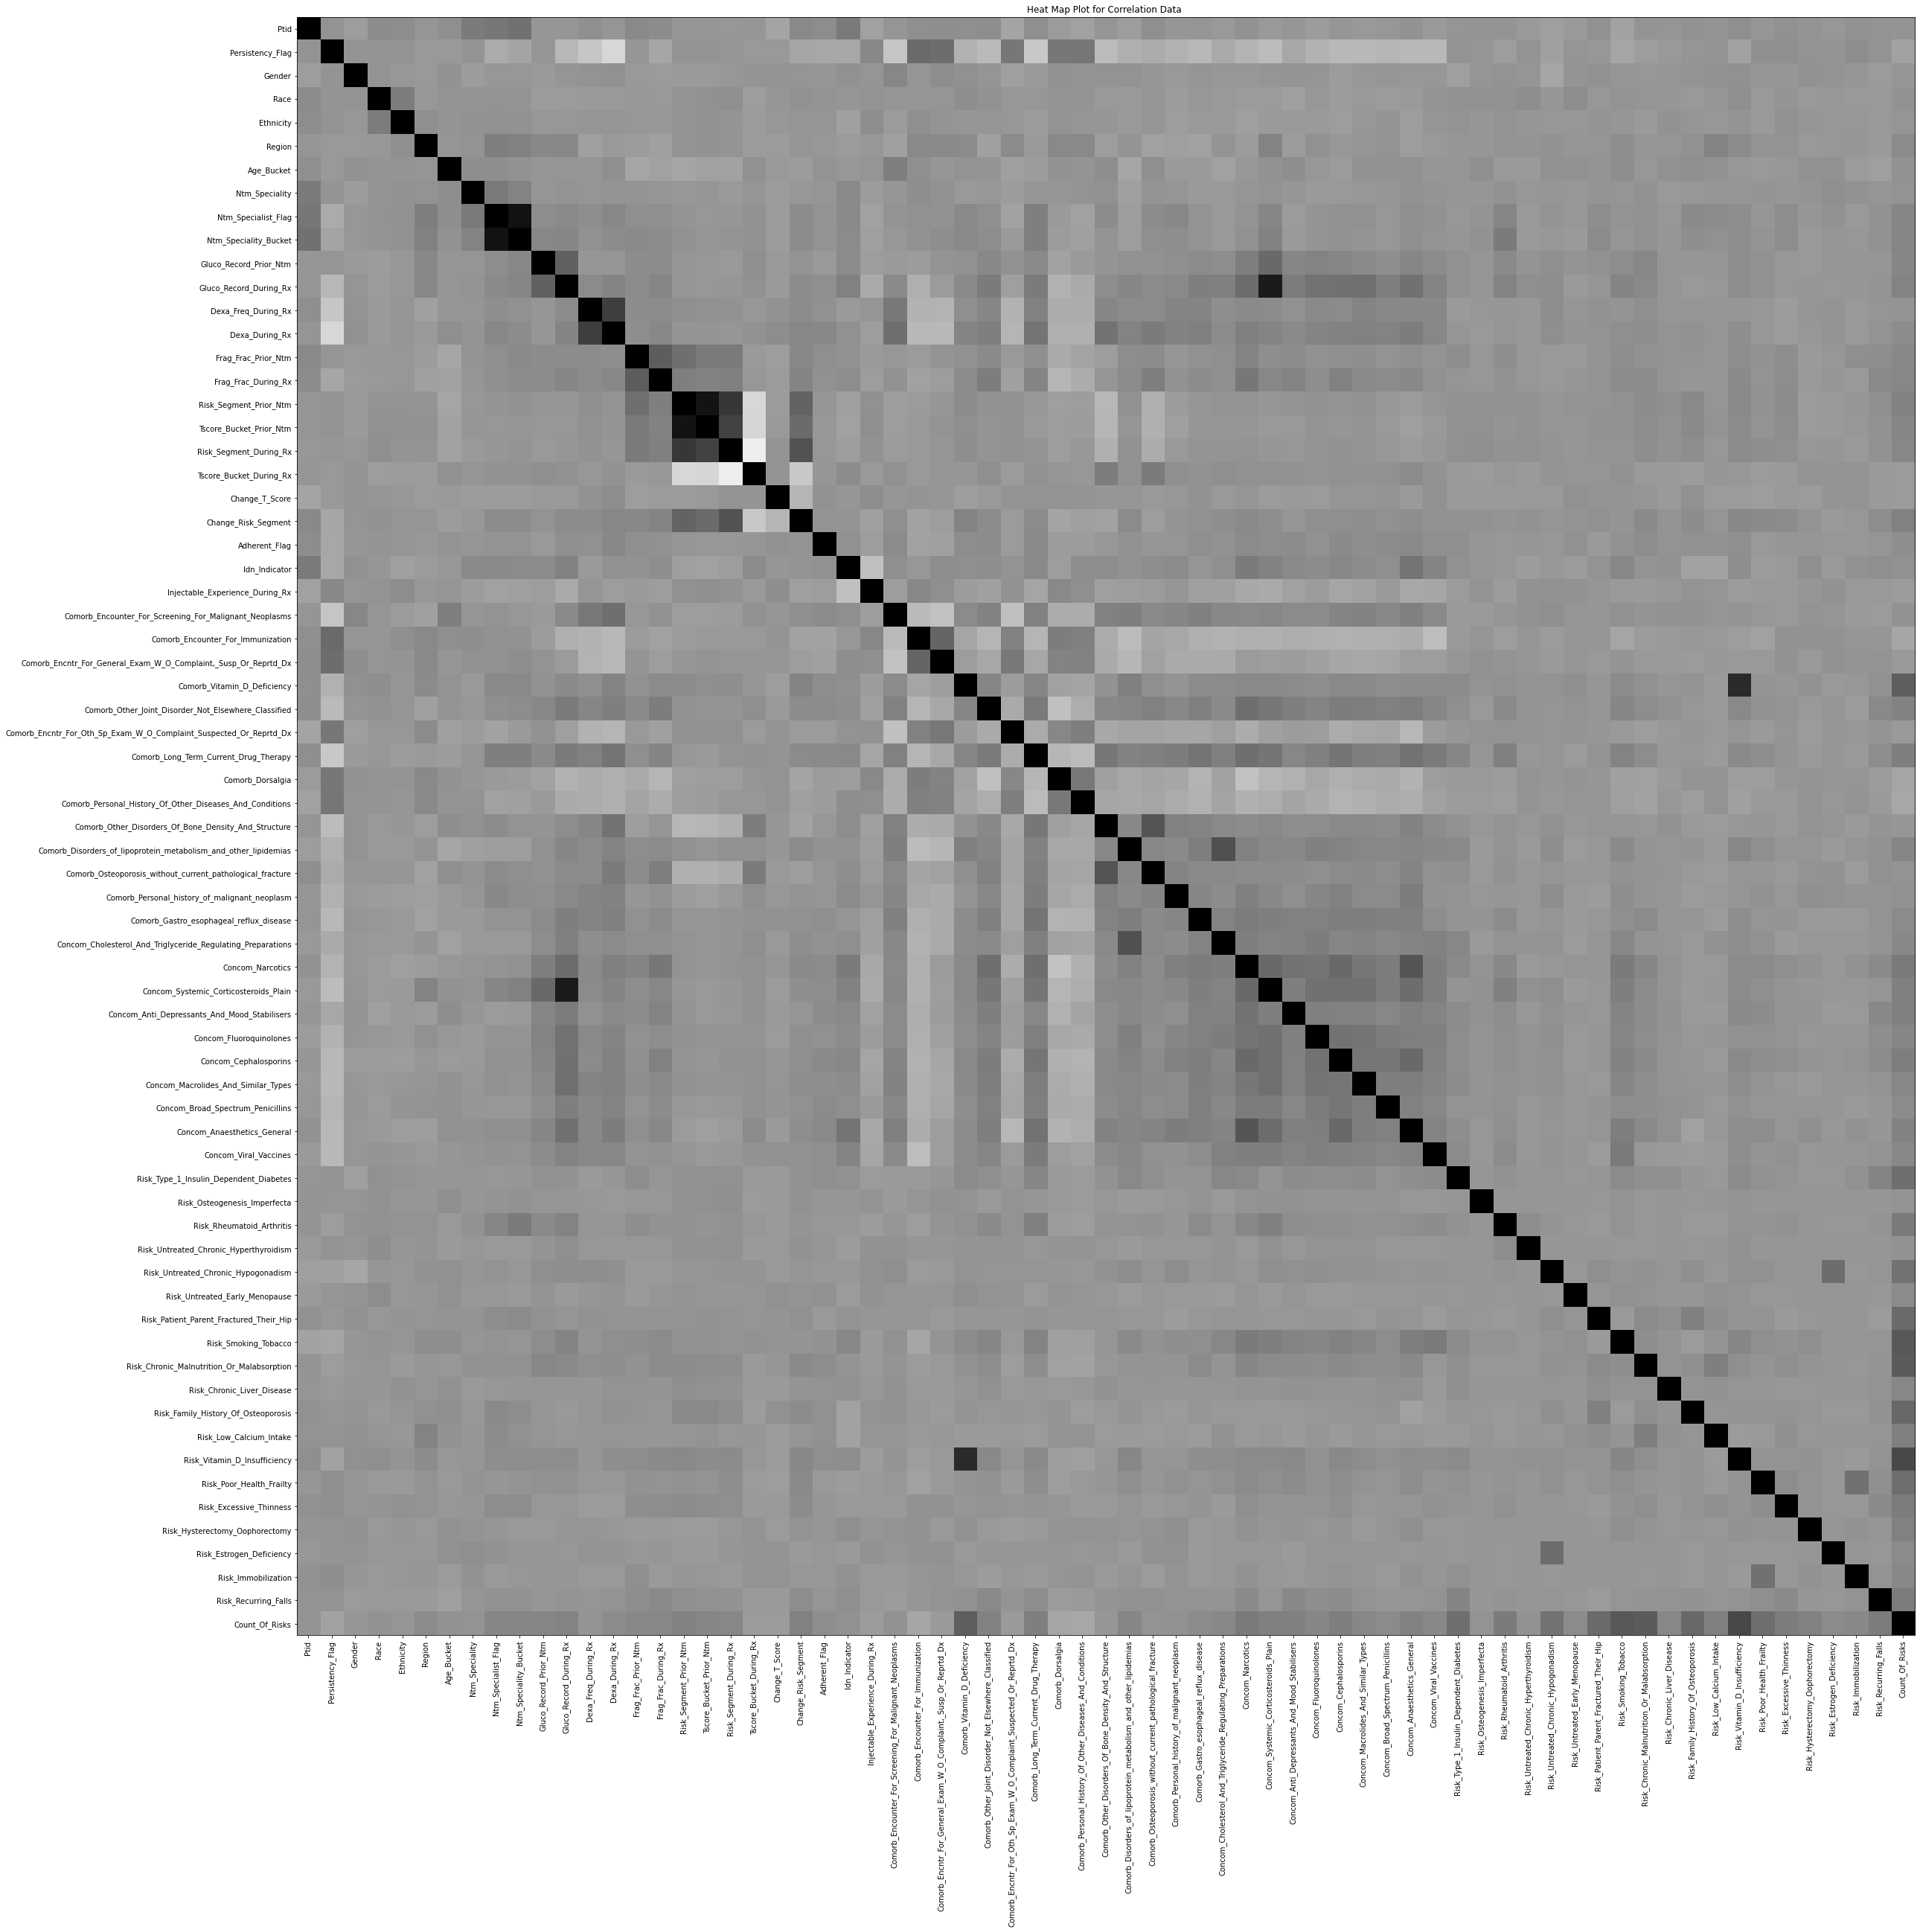

In [79]:
#Heatmap plot

fig, ax = plt.subplots(1,1 , figsize = (40,40))
im = ax.imshow(df.corr())
labels = df.corr().index
plt.xticks(range(0,len(df.corr().index)), df.corr(), rotation = 90)
plt.yticks(range(0,len(df.corr().columns)), df.corr().columns, rotation = 0)
plt.imshow(df.corr(), cmap='Greys', interpolation='nearest',vmax=1, vmin=-1, origin = 'upper')
plt.title('Heat Map Plot for Correlation Data ')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


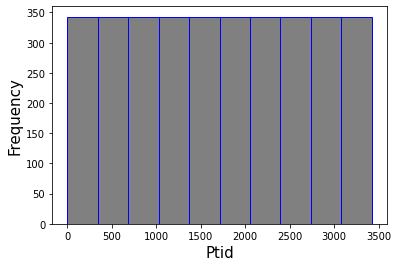

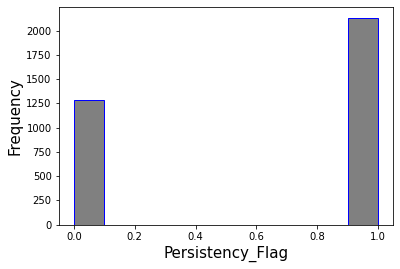

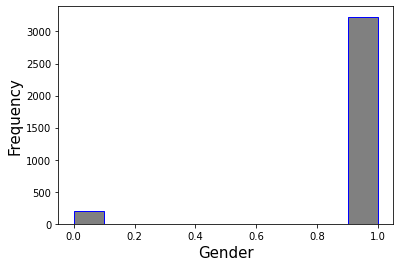

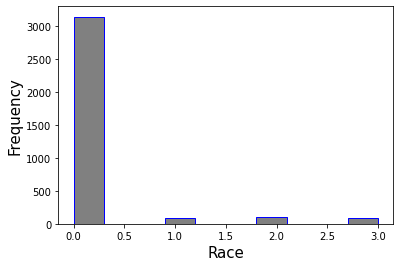

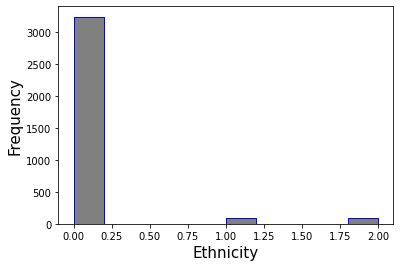

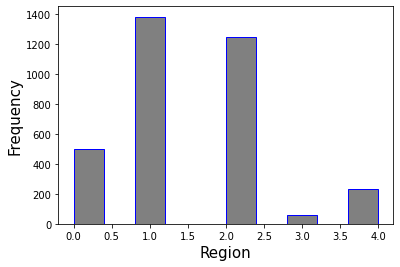

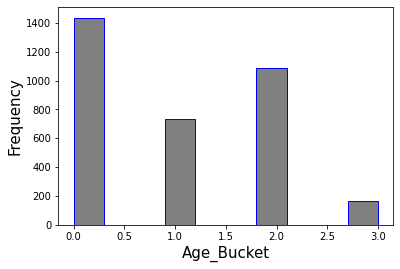

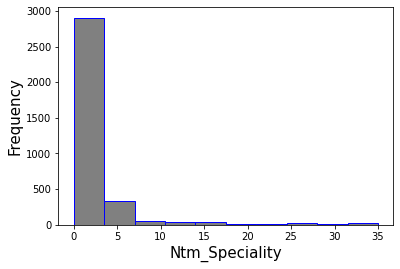

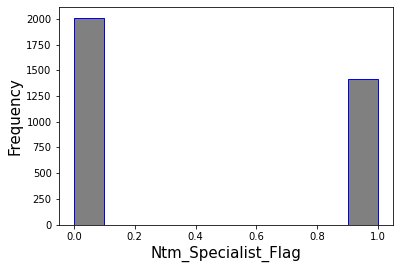

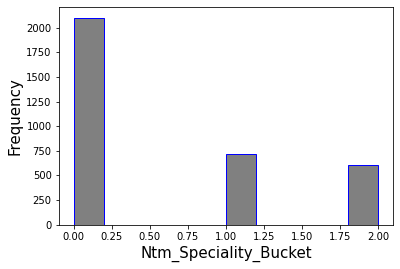

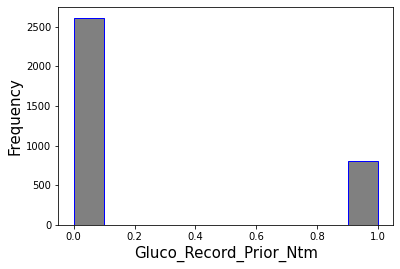

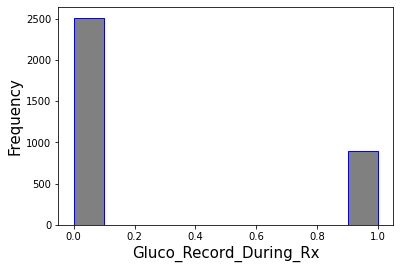

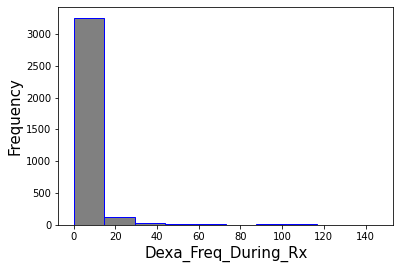

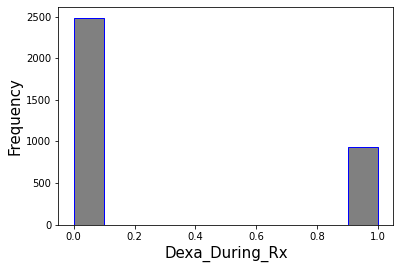

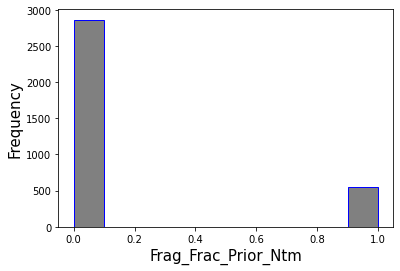

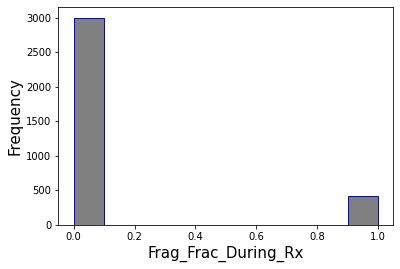

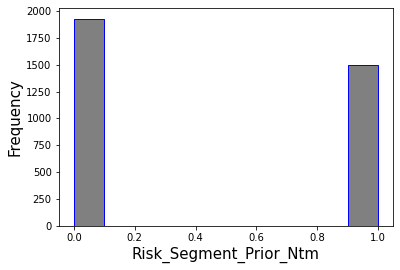

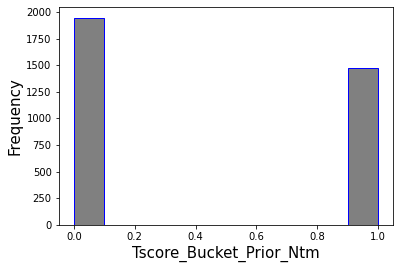

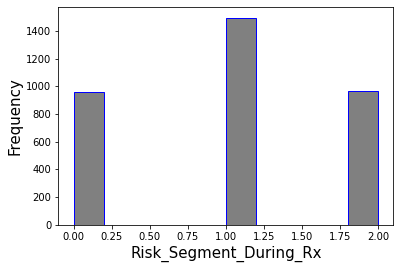

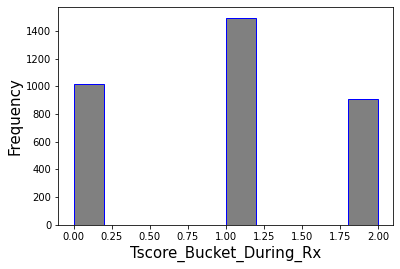

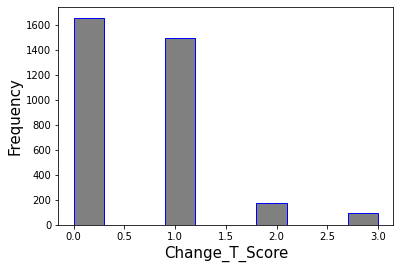

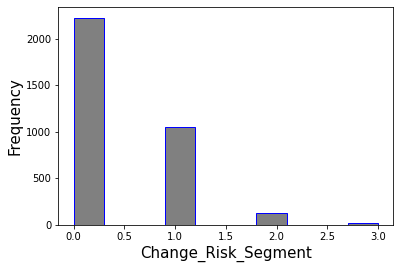

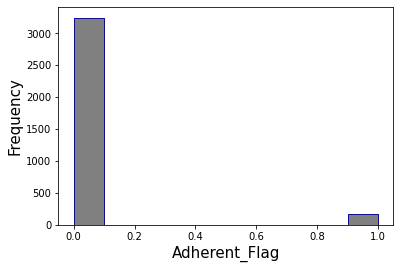

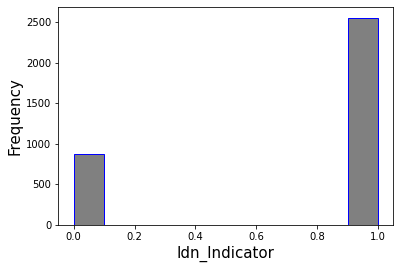

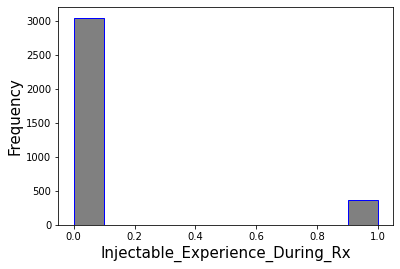

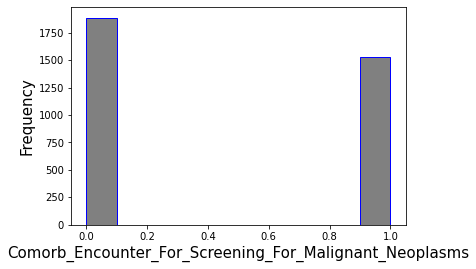

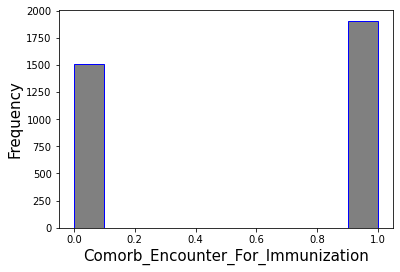

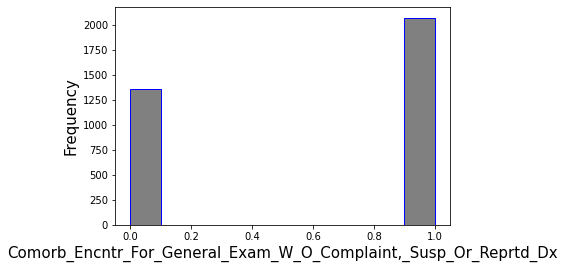

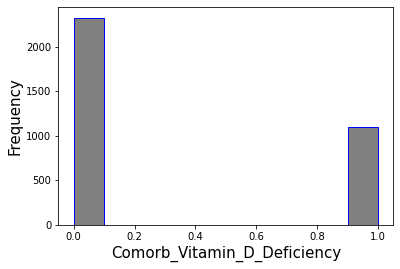

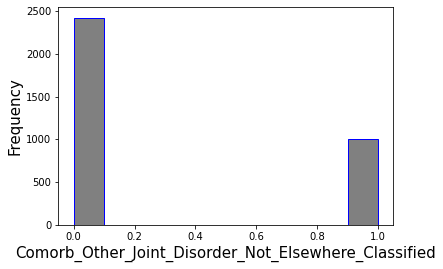

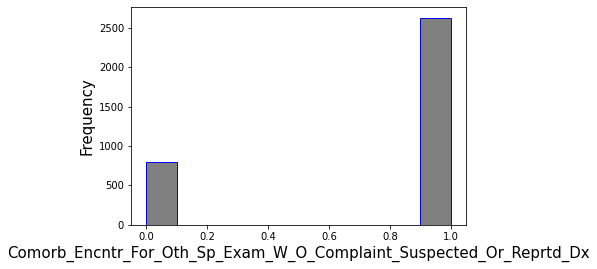

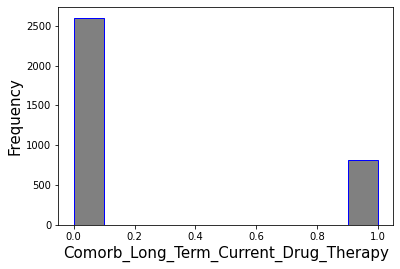

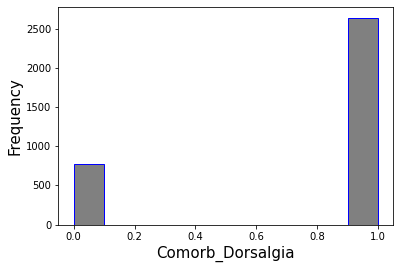

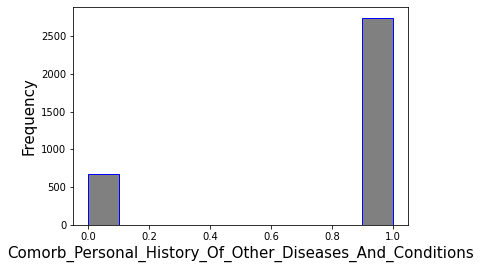

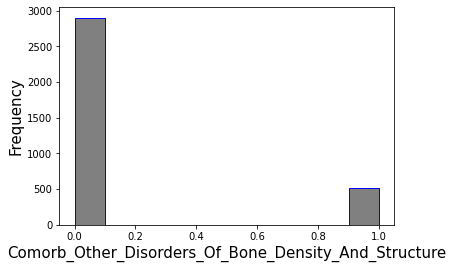

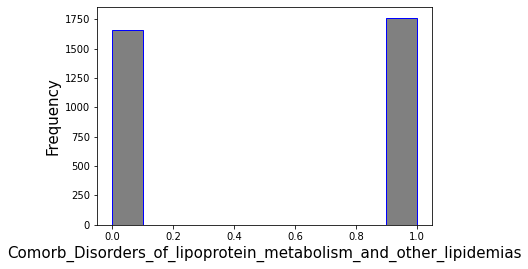

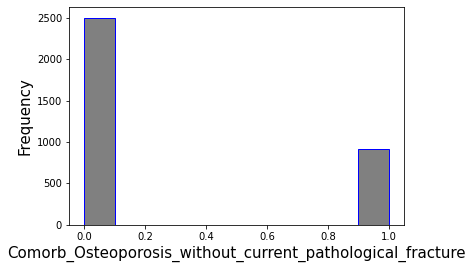

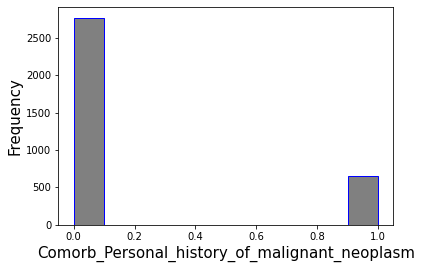

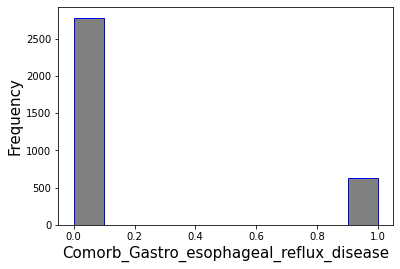

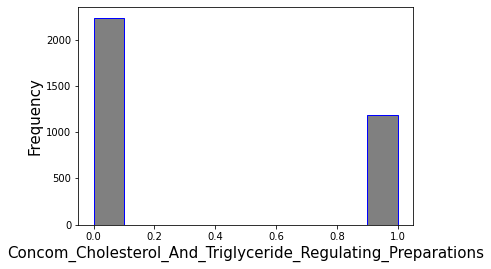

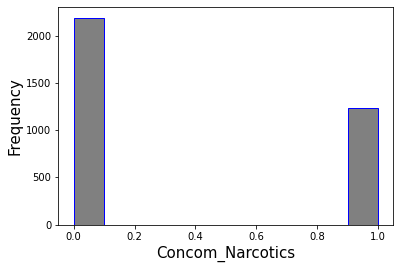

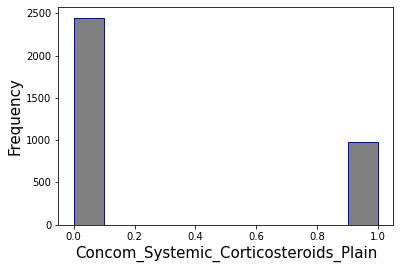

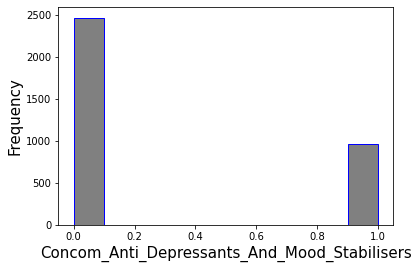

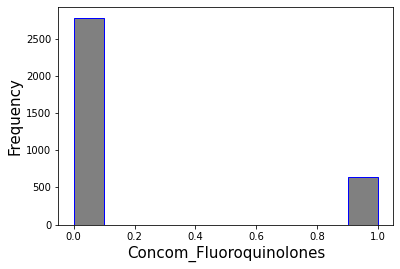

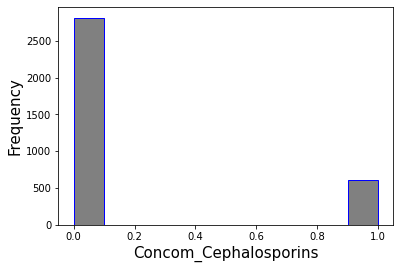

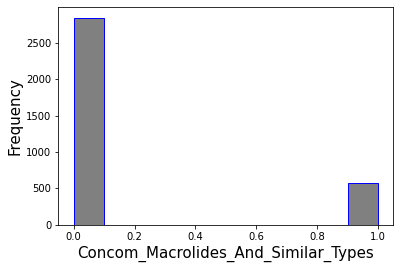

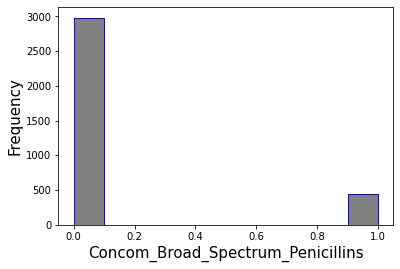

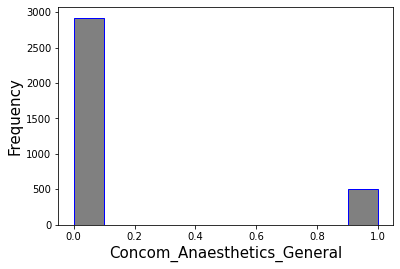

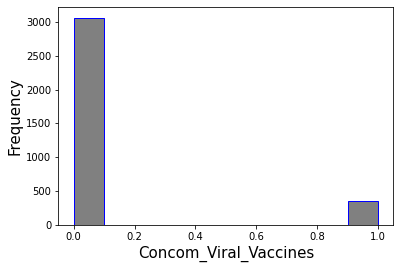

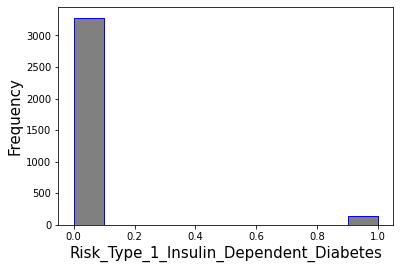

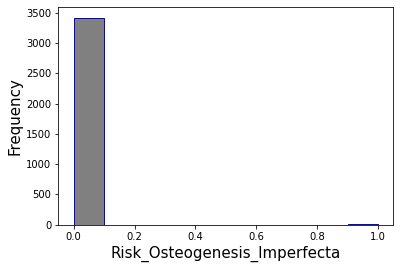

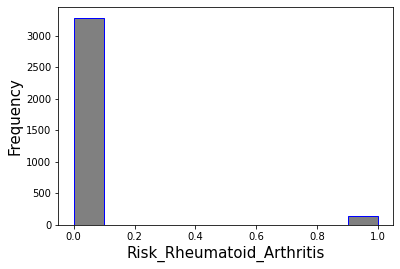

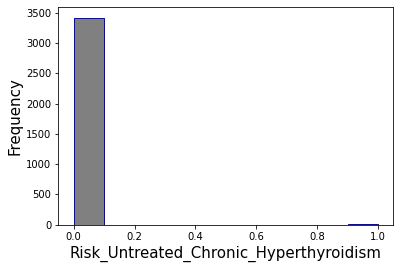

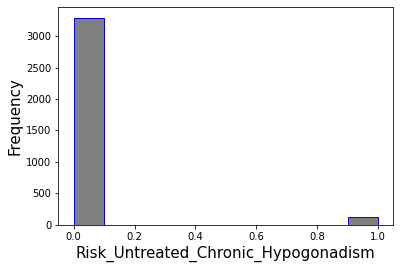

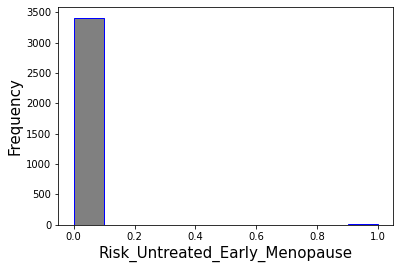

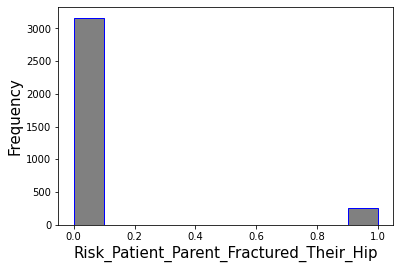

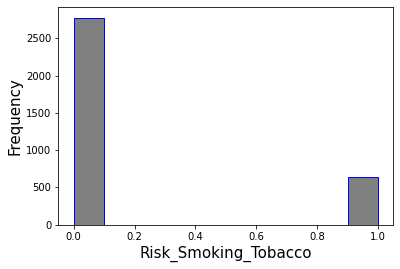

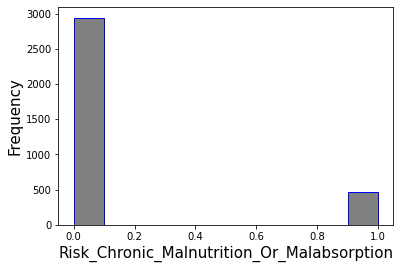

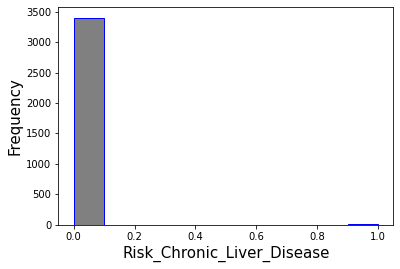

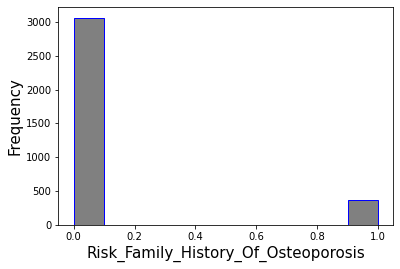

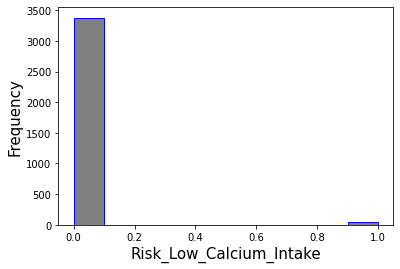

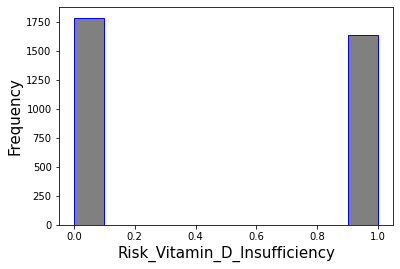

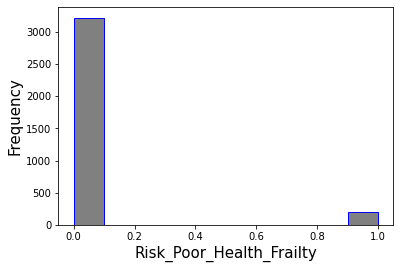

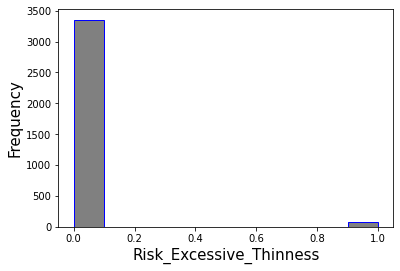

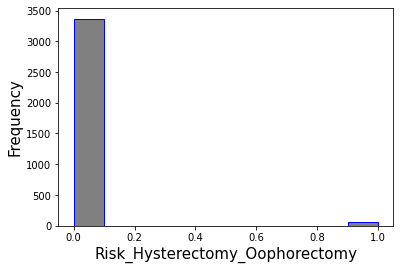

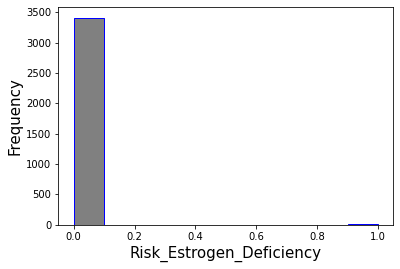

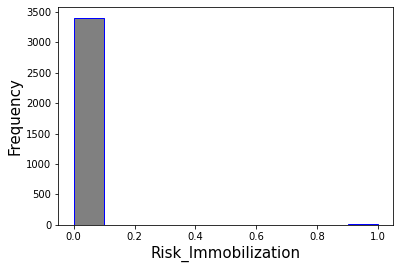

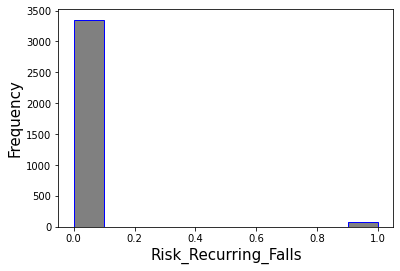

In [80]:
#plotting the histogram
for i, col in enumerate(df.columns[:-1]):
    plt.figure(i)
    plt.ylabel("Frequency", fontsize = 15)
    plt.xlabel(col, fontsize = 15)
    plt.hist(df[col], color= 'grey', edgecolor = 'b');

# Outliers

In [81]:
df_c = df

1) Using IQR

In [82]:
QR1 = df.quantile(0.25)
QR3 = df.quantile(0.75)

IQR = QR3 - QR1
((df < (QR1 - 1.5 * IQR)) | (df > (QR3 + 1.5 * IQR))).any(axis=1)
    
#Print the IQR range 
print(IQR)

print('\n')
print("Outliers in the dataset : (True values in the below table)")
#The value where the "True" exist in below output is the outliers
(df < (QR1 - 1.5 * IQR)) | (df > (QR3 + 1.5 * IQR))


Ptid                              1711.5
Persistency_Flag                     1.0
Gender                               0.0
Race                                 0.0
Ethnicity                            0.0
                                   ...  
Risk_Hysterectomy_Oophorectomy       0.0
Risk_Estrogen_Deficiency             0.0
Risk_Immobilization                  0.0
Risk_Recurring_Falls                 0.0
Count_Of_Risks                       2.0
Length: 69, dtype: float64


Outliers in the dataset : (True values in the below table)


,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3420,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3421,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3422,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [83]:
#Remove the outliers( Datapoints outside 25% and 75% Quarters)
df1 = df[~((df < (QR1 - 1.5 * IQR)) | (df > (QR3 + 1.5 * IQR))).any(axis=1)]
df1

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
11,11,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,16,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,25,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27,27,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,36,1,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3292,3292,1,1,0,0,2,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3297,3297,1,1,0,0,2,0,2,1,1,...,0,0,0,0,0,0,0,0,0,0
3349,3349,1,1,0,0,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3369,3369,1,1,0,0,2,0,2,1,1,...,0,0,0,0,0,0,0,0,0,0


In [84]:
df1.shape

(209, 69)

In [85]:
df1.describe()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
count,209.000000,209.000000,209.0,209.0,209.0,209.000000,209.000000,209.000000,209.000000,209.000000,...,209.0,209.0,209.000000,209.0,209.0,209.0,209.0,209.0,209.0,209.000000
mean,1417.717703,0.947368,1.0,0.0,0.0,1.258373,1.057416,0.985646,0.282297,0.349282,...,0.0,0.0,0.363636,0.0,0.0,0.0,0.0,0.0,0.0,0.363636
std,1074.308114,0.223833,0.0,0.0,0.0,0.650620,0.983789,1.618637,0.451198,0.670471,...,0.0,0.0,0.482201,0.0,0.0,0.0,0.0,0.0,0.0,0.482201
min,11.000000,0.000000,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,449.000000,1.000000,1.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
50%,1210.000000,1.000000,1.0,0.0,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
75%,2343.000000,1.000000,1.0,0.0,0.0,2.000000,2.000000,2.000000,1.000000,0.000000,...,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
max,3407.000000,1.000000,1.0,0.0,0.0,3.000000,3.000000,6.000000,1.000000,2.000000,...,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000


2) Using Zscore

In [86]:
from scipy import stats
df2 = df[(np.abs(stats.zscore(df)) < 2).all(axis=1)]

In [87]:
df2.describe()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
count,319.000000,319.000000,319.0,319.000000,319.0,319.000000,319.000000,319.000000,319.000000,319.000000,...,319.0,319.0,319.000000,319.0,319.0,319.0,319.0,319.0,319.0,319.000000
mean,1573.736677,0.880878,1.0,0.037618,0.0,1.235110,0.962382,1.194357,0.282132,0.373041,...,0.0,0.0,0.376176,0.0,0.0,0.0,0.0,0.0,0.0,0.376176
std,1079.858769,0.324441,0.0,0.190568,0.0,0.666746,0.856989,1.966664,0.450744,0.710674,...,0.0,0.0,0.485186,0.0,0.0,0.0,0.0,0.0,0.0,0.485186
min,11.000000,0.000000,1.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,576.500000,1.000000,1.0,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
50%,1446.000000,1.000000,1.0,0.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
75%,2599.000000,1.000000,1.0,0.000000,0.0,2.000000,2.000000,2.000000,1.000000,0.000000,...,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
max,3423.000000,1.000000,1.0,1.000000,0.0,3.000000,2.000000,11.000000,1.000000,2.000000,...,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000


3) Quantile filter

In [88]:
df3 = df
cols = df3.select_dtypes('number').columns
lim = np.logical_and(df3 < df.quantile(0.99, numeric_only=False),
                     df3 > df.quantile(0.01, numeric_only=False))
df3.loc[:, cols] = df3.where(lim, np.nan)


In [89]:
df3.describe()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
count,3354.000000,0.0,0.0,181.000000,98.0,2690.000000,1819.000000,1853.000000,0.0,716.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2340.000000
mean,1711.500000,NaN,NaN,1.535912,1.0,1.508178,1.597031,3.542364,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.604701
std,968.360728,NaN,NaN,0.500092,0.0,0.542819,0.490629,3.528955,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.714280
min,35.000000,NaN,NaN,1.000000,1.0,1.000000,1.000000,1.000000,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,873.250000,NaN,NaN,1.000000,1.0,1.000000,1.000000,2.000000,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
50%,1711.500000,NaN,NaN,2.000000,1.0,1.000000,2.000000,3.000000,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
75%,2549.750000,NaN,NaN,2.000000,1.0,2.000000,2.000000,4.000000,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
max,3388.000000,NaN,NaN,2.000000,1.0,3.000000,2.000000,27.000000,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000


Using any of these above methods to remove the outlier would result in large loss of data and the methods wont be exactly fit as most of the columns are categorical values which could be mis interpreted as outlier and can be removed wrongly. Hence we need to identify any columns which are not categorical and apply the outlier methods to those only. From the descriptive statistics at the start of the analysis we found that there was only Dexa_Freq_During_Rx	and Count_Of_Risks columns are numerical only. Hence we are going to apply the outlier removal for these 2 columns.

In [90]:
df_backup

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,P3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,Y,N,N,N,N,N,N,1
3420,P3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
3421,P3422,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,...,N,N,Y,N,N,N,N,N,N,1
3422,P3423,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0


In [91]:
df = df_backup.copy(deep = True)

In [92]:
df

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,P3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,Y,N,N,N,N,N,N,1
3420,P3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
3421,P3422,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,...,N,N,Y,N,N,N,N,N,N,1
3422,P3423,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0


In [93]:
df_outlier = df[["Dexa_Freq_During_Rx","Count_Of_Risks"]]
df_outlier

,Dexa_Freq_During_Rx,Count_Of_Risks
0,0,0
1,0,0
2,0,2
3,0,1
4,0,1
...,...,...
3419,0,1
3420,0,0
3421,7,1
3422,0,0


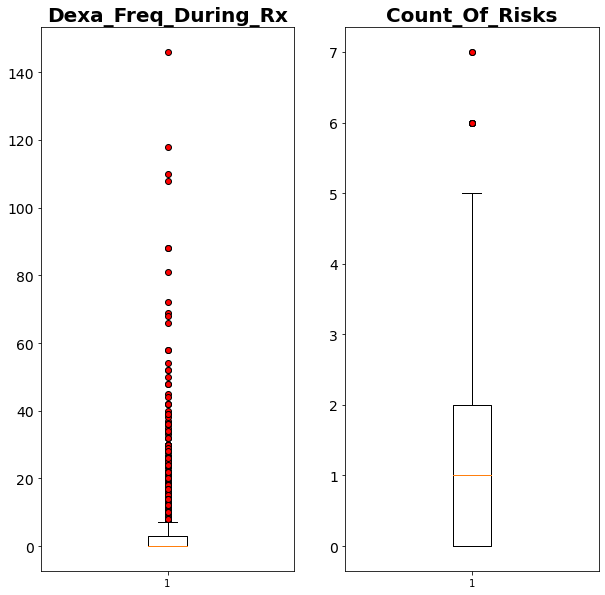

In [94]:
#plotting boxplot
properties = dict(markerfacecolor = 'red', marker = 'o', markeredgecolor = 'black')
fig, ax = plt.subplots(1, 2, figsize = (10, 10))

for i, ax in enumerate(ax.flat):
    ax.boxplot(df_outlier.iloc[:,i], flierprops =  properties)
    ax.set_title(df_outlier.columns[i], fontsize = 20, fontweight= 'bold')
    ax.tick_params(axis= 'y', labelsize = 14)
plt.tight_layout;

The red colour dots clearly shows the presence of outliers and we will remove it

In [95]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """


In [96]:
df

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,P3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,Y,N,N,N,N,N,N,1
3420,P3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
3421,P3422,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,...,N,N,Y,N,N,N,N,N,N,1
3422,P3423,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0


In [97]:
df.describe()

,Dexa_Freq_During_Rx,Count_Of_Risks
count,2956.000000,2956.000000
mean,0.789242,1.216847
std,1.927422,1.072972
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,0.000000,2.000000
max,7.000000,5.000000


In [98]:
df.dtypes

Ptid                              object
Persistency_Flag                  object
Gender                            object
Race                              object
Ethnicity                         object
                                   ...  
Risk_Hysterectomy_Oophorectomy    object
Risk_Estrogen_Deficiency          object
Risk_Immobilization               object
Risk_Recurring_Falls              object
Count_Of_Risks                     int64
Length: 69, dtype: object

In [99]:
#Lets check null value again
df.isnull().sum()

Ptid                              0
Persistency_Flag                  0
Gender                            0
Race                              0
Ethnicity                         0
                                 ..
Risk_Hysterectomy_Oophorectomy    0
Risk_Estrogen_Deficiency          0
Risk_Immobilization               0
Risk_Recurring_Falls              0
Count_Of_Risks                    0
Length: 69, dtype: int64

# **Feature Selection**

The columns Risk_Type_1_Insulin_Dependent_Diabetes,	Risk_Osteogenesis_Imperfecta,	Risk_Rheumatoid_Arthritis,	Risk_Untreated_Chronic_Hyperthyroidism,	Risk_Untreated_Chronic_Hypogonadism,	Risk_Untreated_Early_Menopause,	Risk_Patient_Parent_Fractured_Their_Hip	,Risk_Smoking_Tobacco,	Risk_Chronic_Malnutrition_Or_Malabsorption,	Risk_Chronic_Liver_Disease,	Risk_Family_History_Of_Osteoporosis	,Risk_Low_Calcium_Intake,	Risk_Vitamin_D_Insufficiency,	Risk_Poor_Health_Frailty,	Risk_Excessive_Thinness,	Risk_Hysterectomy_Oophorectomy,	Risk_Estrogen_Deficiency,	Risk_Immobilization	Risk_Recurring_Falls are summed to Count_Of_Risks column. Hence all the above column can be dropped.


In [100]:
df = df.drop(['Risk_Type_1_Insulin_Dependent_Diabetes','Risk_Osteogenesis_Imperfecta','Risk_Rheumatoid_Arthritis','Risk_Untreated_Chronic_Hyperthyroidism','Risk_Untreated_Chronic_Hypogonadism','Risk_Untreated_Early_Menopause','Risk_Patient_Parent_Fractured_Their_Hip','Risk_Smoking_Tobacco','Risk_Chronic_Malnutrition_Or_Malabsorption','Risk_Chronic_Liver_Disease','Risk_Family_History_Of_Osteoporosis','Risk_Low_Calcium_Intake','Risk_Vitamin_D_Insufficiency','Risk_Poor_Health_Frailty','Risk_Excessive_Thinness','Risk_Hysterectomy_Oophorectomy','Risk_Estrogen_Deficiency','Risk_Immobilization','Risk_Recurring_Falls'], axis = 1)

In [101]:
df.shape

(2956, 50)

In [102]:
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,Y,Y,N,N,N,N,N,N,Y,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,Y,Y,Y,N,N,N,N,N,N,1


The Disease/Treatment Factor -the column name starts with 'Concom' or 'Comorb', this is grouped together by summing the number of positive for that and dropping the unwanted columns. 

In [103]:
grouping_dict = {}

grouping = ['Concom','Comorb']

for val in grouping:
    for col in df.columns:
        if col.startswith(val):
            grouping_dict[col] = val

In [104]:
grouping_dict

{'Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias': 'Comorb',
 'Comorb_Dorsalgia': 'Comorb',
 'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx': 'Comorb',
 'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx': 'Comorb',
 'Comorb_Encounter_For_Immunization': 'Comorb',
 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms': 'Comorb',
 'Comorb_Gastro_esophageal_reflux_disease': 'Comorb',
 'Comorb_Long_Term_Current_Drug_Therapy': 'Comorb',
 'Comorb_Osteoporosis_without_current_pathological_fracture': 'Comorb',
 'Comorb_Other_Disorders_Of_Bone_Density_And_Structure': 'Comorb',
 'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified': 'Comorb',
 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions': 'Comorb',
 'Comorb_Personal_history_of_malignant_neoplasm': 'Comorb',
 'Comorb_Vitamin_D_Deficiency': 'Comorb',
 'Concom_Anaesthetics_General': 'Concom',
 'Concom_Anti_Depressants_And_Mood_Stabilisers': 'Concom',
 'Concom_Broad_Spectrum_Penic

In [105]:
grouped_columns = [x for x in grouping_dict.keys()]

In [106]:
grouped_columns

['Concom_Cholesterol_And_Triglyceride_Regulating_Preparations',
 'Concom_Narcotics',
 'Concom_Systemic_Corticosteroids_Plain',
 'Concom_Anti_Depressants_And_Mood_Stabilisers',
 'Concom_Fluoroquinolones',
 'Concom_Cephalosporins',
 'Concom_Macrolides_And_Similar_Types',
 'Concom_Broad_Spectrum_Penicillins',
 'Concom_Anaesthetics_General',
 'Concom_Viral_Vaccines',
 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
 'Comorb_Encounter_For_Immunization',
 'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
 'Comorb_Vitamin_D_Deficiency',
 'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
 'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
 'Comorb_Long_Term_Current_Drug_Therapy',
 'Comorb_Dorsalgia',
 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
 'Comorb_Other_Disorders_Of_Bone_Density_And_Structure',
 'Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias',
 'Comorb_Osteoporosis_without_current_pathological_fracture'

In [107]:
#Encode the yes and no to numberical values
le = LabelEncoder()
for val in grouped_columns:
    df[val] = le.fit_transform(df[val])

In [108]:
#create another dataframe with Ptid as index and taking the sum of the grouped columns above
df_1 = df.set_index('Ptid').groupby(grouping_dict,axis=1).sum()


In [109]:
df_1.columns = ['Concomitancy_count','Comorbidity_count']
df_1 = df_1.reset_index()

In [110]:
#Merge the count to the original dataframe
df = pd.merge(df, df_1, on='Ptid', how = 'inner')

In [111]:
#Drop the unwanted columns
df = df.drop(grouped_columns,axis=1)

In [112]:
df.shape

(2956, 28)

# Convert to numerical variables

In [119]:
#get all categorical columns
cat_columns = df.select_dtypes(['object']).columns

#convert all categorical columns to numeric
df[cat_columns] = df[cat_columns].apply(lambda x: pd.factorize(x)[0])

#view updated DataFrame
df

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Count_Of_Risks,Concomitancy_count,Comorbidity_count
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,0
1,1,1,0,1,0,0,1,0,0,0,...,1,1,1,0,0,0,0,0,1,0
2,2,1,1,2,1,1,2,0,0,0,...,2,0,0,1,0,0,0,2,2,1
3,3,1,1,0,0,1,0,0,0,0,...,2,0,0,1,0,0,0,1,6,3
4,4,1,1,0,0,1,0,0,0,0,...,1,1,1,0,0,0,0,1,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2951,2951,0,1,0,0,2,0,0,0,0,...,1,1,1,0,0,1,0,1,7,5
2952,2952,0,1,0,0,2,0,5,0,0,...,1,1,1,0,1,1,0,0,0,2
2953,2953,0,1,0,0,2,0,1,1,1,...,2,0,0,2,0,1,0,1,4,3
2954,2954,1,1,0,0,2,1,5,0,0,...,1,1,1,0,0,1,0,0,2,2


# Preprocessing

1. Import the values

In [120]:
y = df['Persistency_Flag']

In [121]:
x = df.drop(['Persistency_Flag'],axis = 1)

In [122]:
x.shape

(2956, 27)

In [123]:
Y= y.values
X=x.values

2. Divide into test train 

In [124]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

3. Apply Standard Scaler

In [125]:
#Apply standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_train_copy = x_train
x_test_copy = x_test

In [126]:
x_train_copy.shape

(2364, 27)

# PCA

In [127]:
#Apply PCA for dimensionality reduction - Let's find out how many variables to retain
from sklearn.decomposition import PCA
pca = PCA()
 
x_train_copy = pca.fit_transform(x_train)
x_test_copy = pca.transform(x_test)
 
explained_variance = pca.explained_variance_ratio_

**Screeplot to identify the number of major components**

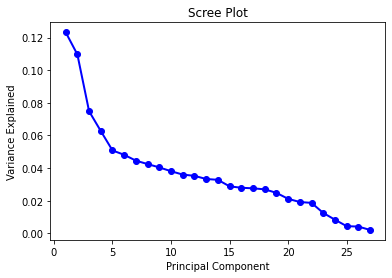

In [128]:
#Scree PLOT

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

INFERENCE:

From the Scree plot it is clear that there are only 6 variables contribute maximum to the output. Hence we can take n_Components = 6 and do the PCA for only the top 6

**PCA for Dimensionality Reduction**

In [129]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 6)
 
x_train = pca.fit_transform(x_train)
x_test= pca.transform(x_test)
 
explained_variance = pca.explained_variance_ratio_

In [130]:
sum(explained_variance)

0.4691014092434735

In [131]:
import seaborn as sns